# Principle Component Analysis (PCA)

### Importing Libraries

In [1]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

### Importing Dataset

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

# The dataset is split into data (x) and labels (y)
x, y = mnist.data, mnist.target

C:\Users\Asad\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
x, y=mnist['data'], mnist['target']
x,y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

### Preparing Data for Training and Testing

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=22)

# Applying Different Classifiers without PCA

In [5]:
# Decision Tree

classifier_for_dt = DecisionTreeClassifier(max_depth=20)
classifier_for_dt.fit(x_train, y_train)
predictions_for_dt=classifier_for_dt.predict(x_test)

score_for_dt=classifier_for_dt.score(x_test, y_test)
score_per_dt = score_for_dt * 100
score_round_dt = round(score_per_dt, 2)
print('Accuracy for Decision Tree: ', score_round_dt,'%')

# KNN Classifier
classifier_for_knn = KNeighborsClassifier(n_neighbors=3)
classifier_for_knn.fit(x_train, y_train)
predictions_for_knn=classifier_for_knn.predict(x_test)

score_for_knn=classifier_for_knn.score(x_test, y_test)
score_per_knn = score_for_knn * 100
score_round_knn = round(score_per_knn, 2)
print('Accuracy for KNN: ', score_round_knn,'%')

# Random Forest
classifier_for_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_for_rf.fit(x_train, y_train)
predictions_for_rf=classifier_for_rf.predict(x_test)

score_for_rf=classifier_for_rf.score(x_test, y_test)
score_per_rf = score_for_rf * 100
score_round_rf = round(score_per_rf, 2)
print('Accuracy for Random Forest: ', score_round_rf,'%')

# Naive Bayes
classifier_for_nb = GaussianNB()
classifier_for_nb.fit(x_train, y_train)
predictions_for_nb=classifier_for_nb.predict(x_test)

score_for_nb=classifier_for_nb.score(x_test, y_test)
score_per_nb = score_for_nb * 100
score_round_nb = round(score_per_nb, 2)
print('Accuracy for Naive Bayes: ', score_round_nb,'%')

Accuracy for Decision Tree:  86.82 %
Accuracy for KNN:  97.12 %
Accuracy for Random Forest:  96.81 %
Accuracy for Naive Bayes:  56.28 %


In [8]:
# Creating Table for comparison of accuracy score for different classifiers

from prettytable import PrettyTable

table_without_pca = PrettyTable()

table_without_pca.field_names = ["Classifiers", "Accuracy in %"]

table_without_pca.add_row(["Decision Tree", score_round_dt])
table_without_pca.add_row(["KNN", score_round_knn])
table_without_pca.add_row(["Random Forest", score_round_rf])
table_without_pca.add_row(["Naive Bayes", score_round_nb])

table_without_pca.align["Classifiers", "Accuracy in %"] = "c"
table_without_pca.padding_width = 3


print(table_without_pca)


+-------------------+-------------------+
|    Classifiers    |   Accuracy in %   |
+-------------------+-------------------+
|   Decision Tree   |       86.82       |
|        KNN        |       97.12       |
|   Random Forest   |       96.81       |
|    Naive Bayes    |       56.28       |
+-------------------+-------------------+


# Applying Diffierent Classifiers After Applying PCA

+-----------------+-------------------+-----------+-------------------+-----------------+
|   n_component   |   Decision Tree   |    KNN    |   Random Forest   |   Naive Bayes   |
+-----------------+-------------------+-----------+-------------------+-----------------+
|        9        |       81.37       |   91.62   |       90.11       |      76.37      |
|        20       |       84.31       |   96.86   |       94.76       |      84.33      |
|        31       |        83.9       |   97.56   |        95.3       |      85.87      |
|        42       |       83.63       |   97.65   |       95.32       |      86.94      |
|        53       |       83.83       |   97.65   |       95.24       |      87.14      |
|        64       |       83.35       |   97.49   |       95.14       |      87.38      |
|        75       |        82.9       |   97.47   |        95.3       |      87.51      |
|        86       |       82.59       |   97.45   |       95.03       |      87.13      |
|        9

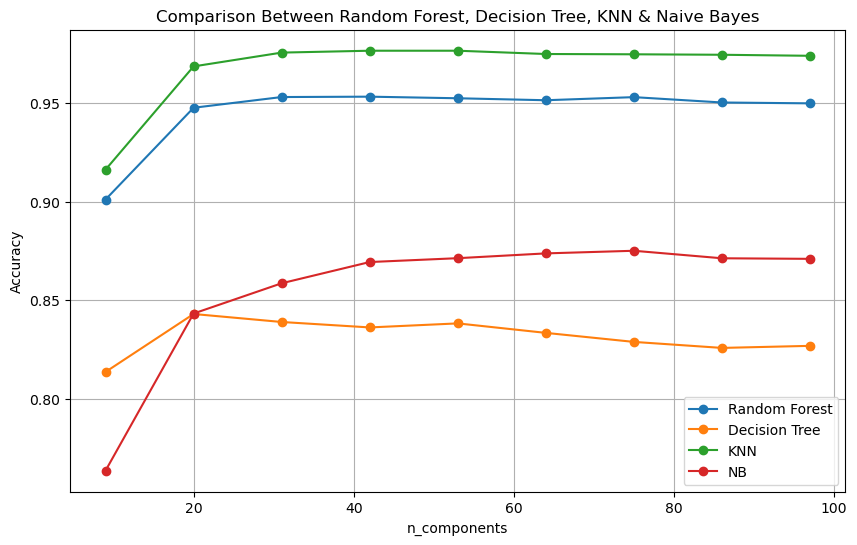

In [7]:

# Lists to store values for plotting
n_components_list = []
accuracy_rf_list = []
accuracy_dt_list = []
accuracy_knn_list = []
accuracy_nb_list = []



for n_component in range(9, 101, 11):
    
    # Apply PCA
    pca = PCA(n_components=n_component)
    X_train_pca = pca.fit_transform(x_train)
    X_test_pca = pca.transform(x_test)

    # Random Forest Classifier
    classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier_rf.fit(X_train_pca, y_train)
    predictions_rf = classifier_rf.predict(X_test_pca)
    accuracy_rf = accuracy_score(y_test, predictions_rf)
    accuracy_rf_list.append(accuracy_rf)

    # Decision Tree Classifier
    classifier_dt = DecisionTreeClassifier(random_state=42)
    classifier_dt.fit(X_train_pca, y_train)
    predictions_dt = classifier_dt.predict(X_test_pca)
    accuracy_dt = accuracy_score(y_test, predictions_dt)
    accuracy_dt_list.append(accuracy_dt)
    

    # KNN Classifier
    classifier_knn = KNeighborsClassifier()
    classifier_knn.fit(X_train_pca, y_train)
    predictions_knn = classifier_knn.predict(X_test_pca)
    accuracy_knn = accuracy_score(y_test, predictions_knn)
    accuracy_knn_list.append(accuracy_knn)

    # NB Classifier
    classifier_nb = GaussianNB()
    classifier_nb.fit(X_train_pca, y_train)
    predictions_nb = classifier_nb.predict(X_test_pca)
    accuracy_nb = accuracy_score(y_test, predictions_nb)
    accuracy_nb_list.append(accuracy_nb)
    
    
    
    n_components_list.append(n_component)

# Creating Table for comparison of accuracy score for different classifiers
    
table = PrettyTable()

table.field_names = ["n_component", "Decision Tree", "KNN", "Random Forest", "Naive Bayes"]

for i in range(len(n_components_list)):

    table.add_row([n_components_list[i], round(accuracy_dt_list[i]*100, 2), round(accuracy_knn_list[i]*100, 2), round(accuracy_rf_list[i]*100, 2), round(accuracy_nb_list[i]*100, 2)])
table.align["n_component"] = "c"
table.padding_width = 3

print(table)

# Creating plot for comparison of accuracy score against n_components for different classifiers
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, accuracy_rf_list, marker='o', label='Random Forest')
plt.plot(n_components_list, accuracy_dt_list, marker='o', label='Decision Tree')
plt.plot(n_components_list, accuracy_knn_list, marker='o', label='KNN')
plt.plot(n_components_list, accuracy_nb_list, marker='o', label='NB')
plt.title("Accuracy vs. n_components")
plt.xlabel("n_components")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Comparison Between Random Forest, Decision Tree, KNN & Naive Bayes")
plt.grid(True)
plt.show()
